# MNIST Hand-written digit classification

### **2018/10/13 KB-KAIST 인공지능 집중 강의**<br/>
Authorized by SIIT, KAIST
Yekang Lee, Jaemyung Yu, and Junmo Kim<br/>
Converted to Jupyter notebook by Kiwon Lee

***Tip> shotcuts for Jupyter Notebook***
* Ctrl + Enter : run cell
* Shift + Enter : run cell and select below

## 1. Load Libraries
* Numpy: Fundamenta package for scientific computing with Python
* Tensorflow: An open source machine learning library for research and production
* Matplotlib: 

In [2]:
from __future__ import print_function
from collections import namedtuple

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.training import moving_averages


In [3]:
num_gpus = 1
log_dir = 'logs/'
batch_size = 100
base_lr = 0.1

HParams = namedtuple('HParams',
                     'batch_size, lrn_rate, '
                     'weight_decay_rate')

## 2. Build a graph
- Option 1: Resnet
- Option 2: VGGnet
- Option 3: Simple network (fill in the blank)
- Option 4: DIY network (fill in the blank)

In [4]:
class Deepnet(object):

  def __init__(self, hps, mode):

    self.hps = hps

    ## HYPERPARAMETER
    self.total_classes = 10
    self.relu_leakiness = 0
    self.mode = mode
    self._extra_train_ops = []
    self.num_residual_units = 3

    ## PLACEHOLDERS
    self.lrn_rate = tf.placeholder(tf.float32, shape=(), name='lrn_rate')
    self.images = tf.placeholder(tf.float32, shape=(hps.batch_size, 28, 28, 1), name='images')
    self.labels = tf.placeholder(tf.float32, shape=(hps.batch_size, self.total_classes), name='labels')


  ## BUILD GRAPH
  ## Option 1: resnet
  ## Option 2: vggnet
  ## Option 3: simple network (fill in the blank!)
  ## Option 4: DIY network (fill in the blank!)

  def build_graph(self):
    ## GLOBAL ITERATION
    self.global_step = tf.contrib.framework.get_or_create_global_step()

    ## FEATURE EXTRACTION
    with tf.variable_scope('embed') as scope:
      #feats = self.resnet(self.images)
     # feats = self.vggnet(self.images)
      feats = self.simple_network(self.images)
      #feats = self.DIY_network(self.images)

    ## LOGITS
    logits = self._fully_connected('logits', feats, self.total_classes)

    ## SOFTMAX 
    self.prediction = tf.nn.softmax(logits)

    ## COST FUNCTION (CROSS ENTROPY)
    cent = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=self.labels)
    self.cost_cls = tf.reduce_mean(cent, name='cent')

    self.build_cost()

    if self.mode == 'train':
      self.build_train_op()


  def build_cost(self):
    if self.mode == 'train':
      self.cost = self.cost_cls
      self.cost += self.decay()
    elif self.mode == 'test':
      self.cost = self.cost_cls

  ## OPTIMIZER (SGD+MOMENTUM)
  def build_train_op(self):
    optimizer = tf.train.MomentumOptimizer(self.lrn_rate, 0.9, use_nesterov=True)
    train_vars = tf.trainable_variables()
    grads = tf.gradients(self.cost, train_vars)
    apply_op = optimizer.apply_gradients(zip(grads, train_vars),
                                         global_step=self.global_step,
                                         name='train_step')

    train_ops = [apply_op] + self._extra_train_ops
    self.train_op = tf.group(*train_ops)

  ## L2 WEIGHT DECAY
  def decay(self):
    costs = []
    for var in tf.trainable_variables():
      if var.op.name.find(r'DW') > 0:
        costs.append(tf.nn.l2_loss(var))

    return tf.multiply(self.hps.weight_decay_rate, tf.add_n(costs))

  ################################
  ####### FILL IN THE BLANK ######
  ################################
  ################################
  ####### BE CREATIVE! ###########
  ################################
  def DIY_network(self, images):
    """ Your Code """















    img_feat = self._global_avg_pool(x)
    return img_feat



  ################################
  ####### FILL IN THE BLANK ######
  ################################
  def simple_network(self, images):
    """ Your Code """

    #conv st1
    x1 = self._conv('st1', images, 3, 1, 16, self._stride_arr(1))
    x1 = self._batch_norm('bn1', x1)
    x1 = self._relu(x1, self.relu_leakiness)
    
     #conf st2
    x2 = self._conv('st3', x1, 3, 16, 16, self._stride_arr(1))
    x2 = self._batch_norm('bn1', x2)
    x2 = self._relu(x2, self.relu_leakiness)

    #conv st1
    x1 = self._conv('st2', x1, 3, 16, 16, self._stride_arr(1))
    x1 = self._batch_norm('bn1', x1)
    x1 = self._relu(x1, self.relu_leakiness)    
    
    #avg pool st2
    x1 = tf.nn.avg_pool(x1, self._stride_arr(2), self._stride_arr(2), 'VALID')    
       
         
    #Eltwise sum
    x= x1 + x2
    
    #conv st1
    x3 = self._conv('st4', x3, 3, 16, 16, self._stride_arr(1))
    x3 = self._batch_norm('bn1', x3)
    x3 = self._relu(x3, self.relu_leakiness)
    
    
    #concatenate sum
    x = tf.concat([x3, x], 3)    
    
    
    #conv st1
    x = self._conv('st5', X, 3, 32, 32, self._stride_arr(1))    
            
    x = self._batch_norm('bn1', x)
    x = self._relu(x, self.relu_leakiness)
    
    
    
    img_feat = self._global_avg_pool(x)
    return img_feat

  ## VGGNET
  ## Very Deep Convolutional Networks for Large-Scale Image Recognition
  ## https://arxiv.org/abs/1409.1556

  def vggnet(self, images, labels=None):
    x = self._conv('conv1', images, 7, 1, 16, self._stride_arr(1))
    x = self._batch_norm('bn1', x)
    x = self._relu(x, self.relu_leakiness)
    x = self._conv('conv2', x, 3, 16, 16, self._stride_arr(1))
    x = self._batch_norm('bn2', x)
    x = self._relu(x, self.relu_leakiness)
    x = tf.nn.avg_pool(x, self._stride_arr(2), self._stride_arr(2), 'VALID')

    x = self._conv('conv3', x, 3, 16, 32, self._stride_arr(1))
    x = self._batch_norm('bn3', x)
    x = self._relu(x, self.relu_leakiness)
    x = self._conv('conv4', x, 3, 32, 32, self._stride_arr(1))
    x = self._batch_norm('bn4', x)
    x = self._relu(x, self.relu_leakiness)
    x = tf.nn.avg_pool(x, self._stride_arr(2), self._stride_arr(2), 'VALID')

    x = self._conv('conv5', x, 3, 32, 64, self._stride_arr(1))
    x = self._batch_norm('bn5', x)
    x = self._relu(x, self.relu_leakiness)
    x = self._conv('conv6', x, 3, 64, 64, self._stride_arr(1))
    x = self._batch_norm('bn6', x)
    x = self._relu(x, self.relu_leakiness)
    img_feat = self._global_avg_pool(x)
    return img_feat


  ## RESNET
  ## Deep Residual Learning for Image Recognition
  ## https://arxiv.org/abs/1512.03385
    
  def resnet(self, images, labels=None):

    with tf.variable_scope('init'):
      x = self._conv('conv1', images, 3, 1, 16, self._stride_arr(1))

    strides = [1, 2, 2]
    activate_before_residual = [True, False, False]
    res_func = self.residual
    filters = [16, 16, 32, 64]

    with tf.variable_scope('unit_1_0'):
      x = res_func(x, filters[0], filters[1], self._stride_arr(strides[0]),
                   activate_before_residual[0])
    for i in range(1, self.num_residual_units):
      with tf.variable_scope('unit_1_%d' % i):
        x = res_func(x, filters[1], filters[1], self._stride_arr(1), False)

    with tf.variable_scope('unit_2_0'):
      x = res_func(x, filters[1], filters[2], self._stride_arr(strides[1]),
                   activate_before_residual[1])
    for i in range(1, self.num_residual_units):
      with tf.variable_scope('unit_2_%d' % i):
        x = res_func(x, filters[2], filters[2], self._stride_arr(1), False)

    with tf.variable_scope('unit_3_0'):
      x = res_func(x, filters[2], filters[3], self._stride_arr(strides[2]),
                   activate_before_residual[2])
    for i in range(1, self.num_residual_units):
      with tf.variable_scope('unit_3_%d' % i):
        x = res_func(x, filters[3], filters[3], self._stride_arr(1), False)
    
    with tf.variable_scope('unit_last'):
      x = self._batch_norm('bn_last', x)
      x = self._relu(x, self.relu_leakiness)
      img_feat = self._global_avg_pool(x)
      return img_feat


  def residual(self, x, in_filter, out_filter, stride,
                activate_before_residual=False):
    """Residual unit with 2 sub layers."""
    if activate_before_residual:
      with tf.variable_scope('shared_activation'):
        x = self._batch_norm('bn_init', x)
        x = self._relu(x, self.relu_leakiness)
        orig_x = x
    else:
      with tf.variable_scope('residual_only_activation'):
        orig_x = x
        x = self._batch_norm('bn_init', x)
        x = self._relu(x, self.relu_leakiness)

    with tf.variable_scope('sub1'):
      x = self._conv('conv1', x, 3, in_filter, out_filter, stride)

    with tf.variable_scope('sub2'):
      x = self._batch_norm('bn2', x)
      x = self._relu(x, self.relu_leakiness)
      x = self._conv('conv2', x, 3, out_filter, out_filter, [1, 1, 1, 1])

    with tf.variable_scope('sub_add'):
      if in_filter != out_filter:
        orig_x = tf.nn.avg_pool(orig_x, stride, stride, 'VALID')
        orig_x = tf.pad(
            orig_x, [[0, 0], [0, 0], [0, 0],
                     [(out_filter-in_filter)//2, (out_filter-in_filter)//2]])
      x += orig_x

    return x

  ## STRIDE
  def _stride_arr(self, stride):
    return [1, stride, stride, 1]
  
    3,3,13
  ## CONVOLUTIONAL LAYER
  def _conv(self, name, x, filter_size, in_filters, out_filters, strides):
    with tf.variable_scope(name):
      n = filter_size * filter_size * out_filters
      w = tf.get_variable(
          'weight/DW', [filter_size, filter_size, in_filters, out_filters],
          tf.float32, initializer=tf.uniform_unit_scaling_initializer(factor=2.0))

      y = tf.nn.conv2d(x, w, strides, padding='SAME')

    return y

  ## RELU LAYER
  def _relu(self, x, leakiness=0.0):
    return tf.maximum(x, leakiness*x)

  ## FULLY-CONNECTED LAYER
  def _fully_connected(self, name, x, out_dim, is_reuse=None):
    with tf.variable_scope(name, reuse=is_reuse):
      x = tf.reshape(x, [self.hps.batch_size, -1])
      w = tf.get_variable(
          'weight/DW', [x.get_shape()[1], out_dim],
          initializer=tf.uniform_unit_scaling_initializer(factor=2.0))
      b = tf.get_variable('bias/DW', [out_dim],
                          initializer=tf.constant_initializer())
      y = tf.nn.xw_plus_b(x, w, b)

    return y

  ## GLOBAL AVERAGE POOLING LAYER
  def _global_avg_pool(self, x):
    assert x.get_shape().ndims == 4
    return tf.reduce_mean(x, [1, 2])

  ## BATCH NORMALIZATION LAYER
  def _batch_norm(self, name, x):
    with tf.variable_scope(name):
      params_shape = [x.get_shape()[-1]]

      beta = tf.get_variable(
          'beta', params_shape, tf.float32,
          initializer=tf.constant_initializer(0.0, tf.float32))
      gamma = tf.get_variable(
          'gamma', params_shape, tf.float32,
          initializer=tf.constant_initializer(1.0, tf.float32))

      if self.mode == 'train':
        mean, variance = tf.nn.moments(x, [0, 1, 2], name='moments')

        moving_mean = tf.get_variable(
            'moving_mean', params_shape, tf.float32,
            initializer=tf.constant_initializer(0.0, tf.float32),
            trainable=False)
        moving_variance = tf.get_variable(
            'moving_variance', params_shape, tf.float32,
            initializer=tf.constant_initializer(1.0, tf.float32),
            trainable=False)

        self._extra_train_ops.append(moving_averages.assign_moving_average(
            moving_mean, mean, 0.9))
        self._extra_train_ops.append(moving_averages.assign_moving_average(
            moving_variance, variance, 0.9))
      else:
        mean = tf.get_variable(
            'moving_mean', params_shape, tf.float32,
            initializer=tf.constant_initializer(0.0, tf.float32),
            trainable=False)
        variance = tf.get_variable(
            'moving_variance', params_shape, tf.float32,
            initializer=tf.constant_initializer(1.0, tf.float32),
            trainable=False)

      # epsilon used to be 1e-5. Maybe 0.001 solves NaN problem in deeper net.
      y = tf.nn.batch_normalization(
          x, mean, variance, beta, gamma, 0.001)
      y.set_shape(x.get_shape())
      return y

# 3. Train a model

In [5]:
tf.logging.set_verbosity(tf.logging.ERROR)
hps = HParams(batch_size=batch_size, lrn_rate=base_lr, weight_decay_rate=0.0001)

  ### 3.1 Load MNIST data and split train/val/test pairs

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz

One-hot labels for this image:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


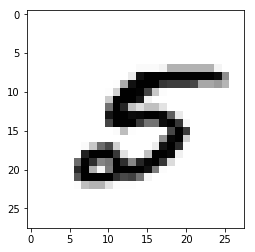

In [6]:
## READ MNIST INPUTS
mnist = input_data.read_data_sets('./data/', one_hot=True)

## NUM_DATA
NUM_DATA = 1000

## TRAIN/VAL SPLITS
train_images = mnist.train.images
train_labels = mnist.train.labels
train_images = train_images.reshape([-1, 28, 28, 1])
train_images = train_images[0:NUM_DATA]
train_labels = train_labels[0:NUM_DATA]

val_images = mnist.validation.images
val_labels = mnist.validation.labels
val_images = val_images.reshape([-1, 28, 28, 1])

## RANDOM SHUFFLING
order = np.random.permutation(train_images.shape[0])
order = order.astype(np.int32)
train_images = train_images[order, :, :, :]
train_labels = train_labels[order, :]

## Plot the 1st image and label
plt.imshow(train_images[0,:,:,0], cmap='Greys')
print("\nOne-hot labels for this image:")
print(train_labels[0])

### 3.2 Build a graph

In [7]:
## BUILD GRAPH
model = Deepnet(hps, 'train')
model.build_graph()

## MAKE SESSION
saver = tf.train.Saver()
# config = tf.ConfigProto(allow_soft_placement=True)
# config.gpu_options.allow_growth = True # Use memory as much as needed
sess = tf.Session()

## INITIALIZE SESSION
sess.run(tf.global_variables_initializer())

## HYPERPARAMETER
lrn_rate = hps.lrn_rate
max_step = 100

ValueError: Variable embed/bn1/beta already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\KAIST\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Users\KAIST\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\KAIST\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)


### 3.3 Updates parameters with back-propagation

In [ ]:
for step in range(max_step+1):

    ## STEP DECAYING
    if step < 2000:
        lrn_rate = hps.lrn_rate
    elif step < 4000:
        lrn_rate = 0.1 * hps.lrn_rate
    else:
        lrn_rate = 0.01 * hps.lrn_rate

    ## BATCH SELECTION
    k_start = hps.batch_size * step % train_images.shape[0]
    k_end = hps.batch_size * step % train_images.shape[0] + hps.batch_size
    batch_images = train_images[k_start:k_end, :, :, :]
    batch_labels = train_labels[k_start:k_end, :]

    ## RUN SESSION
    start_time = time.time()
    (_, loss, loss_cls, truth, prediction, train_step) = sess.run(
        [model.train_op, model.cost, model.cost_cls, model.labels, model.prediction,
        model.global_step],
        feed_dict={model.lrn_rate: lrn_rate,
                    model.images: batch_images,
                    model.labels: batch_labels})
    duration = time.time() - start_time
    sec_per_batch = float(duration)

    ## CALCULATE ACCURACY
    truth = np.argmax(truth, axis=1)
    prediction = np.argmax(prediction, axis=1)
    precision = np.mean(truth == prediction)
    if step % 10 == 0:
        print('  [*] TRAINING Iteration %d, Lr: %.3f, Loss: %.4f, Acc: %.4f (duration: %.3fs)'
                             % (step, lrn_rate, loss_cls, precision, sec_per_batch))

    ## VALIDATION
    if step % 100 == 0:
        total_prediction = 0
        correct_prediction = 0
        for k in range(100):
            ## BATCH SELECTION
            k_start = hps.batch_size * k % val_images.shape[0]
            k_end = hps.batch_size * k % val_images.shape[0] + hps.batch_size
            batch_images = val_images[k_start:k_end, :, :, :]
            batch_labels = val_labels[k_start:k_end, :]
            (loss, truth, prediction) = sess.run(
                [model.cost_cls, model.labels, model.prediction],
                feed_dict={model.images: batch_images,
                          model.labels: batch_labels})

            truth = np.argmax(truth, axis=1)
            prediction = np.argmax(prediction, axis=1)
            precision = np.sum(truth == prediction)
            total_prediction += prediction.shape[0]
            correct_prediction += precision

        precision = 1.0 * correct_prediction / total_prediction
        print('  [*] VALIDATION ACC: %.3f' % precision)
    
    if step % 100 == 0:
        save_path = saver.save(sess, log_dir + "iter_%d" % (step))
        print(' Model saved in file: %s.' % save_path)

print('Optimization done.')
print('Save the checkpoint.')

# 4. Test a model

### 4.1 Load the test images and labels

In [ ]:
## READ MNIST INPUTS
mnist = input_data.read_data_sets('./data/', one_hot=True)
test_images = mnist.test.images
test_labels = mnist.test.labels
test_images = test_images.reshape([-1, 28, 28, 1])
print("\nThe number of test images: %d" % (test_images.shape[0]))

## Plot the 1st test image and label
plt.imshow(test_images[0,:,:,0], cmap='Greys')
print("\nOne-hot labels for this image:")
print(train_labels[0])

### 4.2 Build a model and make a session

In [ ]:
tf.reset_default_graph()

## BUILD GRAPH
hps = HParams(batch_size=1, lrn_rate=base_lr, weight_decay_rate=0.0001)
model = Deepnet(hps, 'test')
model.build_graph()
saver = tf.train.Saver()

## MAKE SESSION 
## if there exist checkpoints, then restore it.
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
ckpt_state = tf.train.get_checkpoint_state(log_dir)
if not (ckpt_state and ckpt_state.model_checkpoint_path):
    print('No model to eval yet at %s' % log_dir)

print('Loading checkpoint %s' % ckpt_state.model_checkpoint_path)
saver.restore(sess, ckpt_state.model_checkpoint_path)

## HYPERPARAMETER
batch_size = 1
total_prediction = 0
correct_prediction = 0

### 4.3 Check the prediction for the first image

In [ ]:
(loss, truth, prediction) = sess.run(
    [model.cost, model.labels, model.prediction],
    feed_dict={model.images: test_images[0,:,:,0].reshape(1,28,28,1),
                model.labels: test_labels[0].reshape(1,10)})

print("The prediction of the network is: %d" % np.argmax(prediction, axis=1))

### 4.4 Average the accuray for 500 test images

In [ ]:
start_time = time.time()
for step in range(500):

    ## BATCH SELECTION
    k_start = hps.batch_size * step % test_images.shape[0]
    k_end = hps.batch_size * step % test_images.shape[0] + hps.batch_size
    batch_images = test_images[k_start:k_end, :, :, :]
    batch_labels = test_labels[k_start:k_end, :]

    ### RUN SESSION
    start_time = time.time()
    (loss, truth, prediction) = sess.run(
        [model.cost, model.labels, model.prediction],
        feed_dict={model.images: batch_images,
                    model.labels: batch_labels})

    truth = np.argmax(truth, axis=1)
    prediction = np.argmax(prediction, axis=1)
    precision = np.sum(truth == prediction)
#     print('Loss: %.4f, Acc: %.4f' 
#                % (loss, precision))
    total_prediction += prediction.shape[0]
    correct_prediction += precision

precision = 1.0 * correct_prediction / total_prediction
print('Acc: %.3f' % precision)